## Comparing TPXO7 and lucky content
This notebook shows that the topography in TPXO7 dataset and "LUCKY" ROMS simulations are 
slightly shifted. Thus, the tidal amplitudes peaks near the top of seamounts, which is why maxima in tidal conversion amplitude are absorved in the neighbourhout of islands and seamounts but not exactly over it when computing the tidal conversion.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from netCDF4 import Dataset, MFDataset
import numpy as np
#from convert_TPXO_to_ellipses import ellipse


In [36]:
path_lucky = '/net/krypton/data0/project/vortex/lahaye/Tide_Conv/input_data/'

### load grid of simulation
ncgrd = Dataset(path_lucky+'lucky_grd.nc','r')
h = ncgrd.variables['h'][:]
lon_h = ncgrd.variables['lon_rho'][:]
lat_h = ncgrd.variables['lat_rho'][:]
mask = ncgrd.variables['mask_rho'][:]
ncgrd.close()

### load tide in simulation
it = 0    # tide period index
ncfrc = Dataset(path_lucky+'luckym2_frc.nc','r')
ue = ncfrc.variables['tide_Cmax'][it,...]
ve = ncfrc.variables['tide_Cmin'][it,...]
ang = ncfrc.variables['tide_Cangle'][it,...]
pha = ncfrc.variables['tide_Cphase'][it,...]
ncfrc.close()

### load TPXO data
#nctpxo = Dataset('/net/libra/local/tmp/1/cvic/croco/TPXO7/TPXO7.nc','r')   # this one not OK
nctpxo = Dataset('/net/ruchba/local/tmp/2/lahaye/TPXO7.2/grid_tpxo7.2.nc','r')   # this one OK
ncvar = nctpxo.variables
#lon_r = nctpxo.variables['lon_r'][:]
#indx, = np.where(np.logical_and(lon_r>lon_h.min()%360,lon_r<lon_h.max()%360))
#lon_r = lon_r[indx]
#lat_r = nctpxo.variables['lat_r'][:]
#indy, = np.where(np.logical_and(lat_r>lat_h.min()%360,lat_r<lat_h.max()%360))
#lat_r = lat_r[indy]
#h_t = nctpxo.variables['h'][indy,indx]
lon_r = ncvar['lon_z'][:]
indx, _ = np.where(np.logical_and(lon_r>lon_h.min()%360,lon_r<lon_h.max()%360))
indx = np.unique(indx)
lat_r = ncvar['lat_z'][:]
_, indy = np.where(np.logical_and(lat_r>lat_h.min()%360,lat_r<lat_h.max()%360))
indy = np.unique(indy)
inds = np.meshgrid(indx,indy,indexing='ij')
lon_r = lon_r[inds].T
lat_r = lat_r[inds].T
h_t = ncvar['hz'][indx,indy].T

print(lon_r.shape, lat_r.shape, h_t.shape, indx.size, indy.size, inds[0].shape)

nctpxo.close()

# load tpxo8 data
nc = Dataset("/net/ruchba/local/tmp/2/lahaye/TPXO8/grid_tpxo8atlas_30_v1.nc",'r')
ncvar = nc.variables
lon_z = ncvar['lon_z'][:]
indx, = np.where(np.logical_and(lon_z>lon_h.min()%360,lon_z<lon_h.max()%360))
lon_z = lon_z[indx]
lat_z = ncvar['lat_z'][:]
indy, = np.where(np.logical_and(lat_z>lat_h.min()%360,lat_z<lat_h.max()%360))
lat_z = lat_z[indy]
ht8 = ncvar['hz'][indx,indy].T
nc.close()

(55, 75) (55, 75) (55, 75) 75 55 (75, 55)


((75, 55), (75, 55), (55, 75), 559, 412)

/home/lahaye/Coding/virtual_envs/py3env/lib/python3.4/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


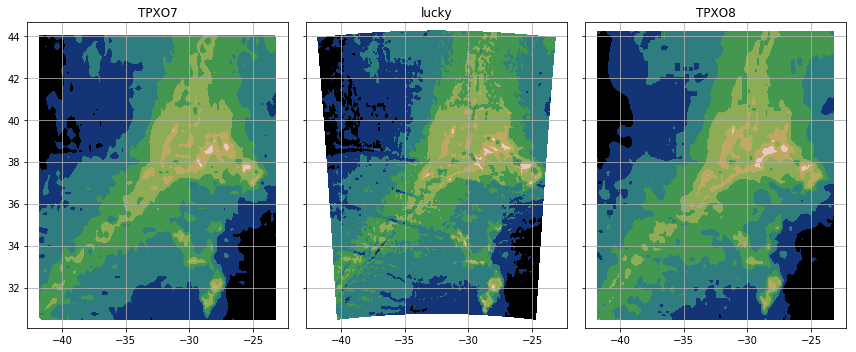

In [37]:
### compare topography
mini = 0
maxi = 5000
cmap = 'gist_earth_r'

fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,5))
#ax1.contourf(lon_r-360,lat_r,h_t,vmin=mini,vmax=maxi,cmap=cmap) #TPXO7 on libra
ax1.contourf(lon_r-360,lat_r,h_t,vmin=mini,vmax=maxi,cmap=cmap) #TPXO7.2 on libra
ax2.contourf(lon_h,lat_h,h,vmin=mini,vmax=maxi,cmap=cmap)
ax3.contourf(lon_z-360,lat_z,ht8,vmin=mini,vmax=maxi,cmap=cmap)
for ax in (ax1,ax2,ax3):
    ax.grid(True)

ax1.set_title('TPXO7')
ax2.set_title('lucky')
ax3.set_title('TPXO8')
ax1.set_aspect(1./np.sin(np.deg2rad(lat_h.mean())))

fig.set_tight_layout(True)

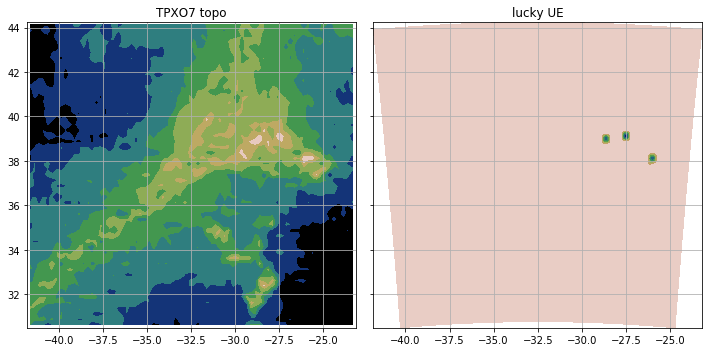

In [43]:
### compare topography
mini = 0
maxi = 5000
cmap = 'gist_earth_r'

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,5))
ax1.contourf(lon_r-360,lat_r,h_t,vmin=mini,vmax=maxi,cmap=cmap)
ax2.contourf(lon_h,lat_h,ue,cmap=cmap)
ax1.grid(True)
ax2.grid(True)
ax1.set_title('TPXO7 topo')
ax2.set_title('lucky UE')

fig.set_tight_layout(True)

In [67]:
# load srtm-30-plus
srtm_path = '/net/alpha/exports/sciences/data/REFERENCE_DATA/BATHYMETRY/DATA/SRTM30_PLUS/'
ncsrtm = MFDataset(srtm_path+'w060n?0.nc',aggdim='y')
lon_s = ncsrtm.variables['x'][:]
indx, = np.where(np.logical_and(lon_s>lon_h.min(),lon_s<lon_h.max()))
lon_s = lon_s[indx]
lat_s = ncsrtm.variables['y'][:]
indy, = np.where(np.logical_and(lat_s>lat_h.min(),lat_s<lat_h.max()))
lat_s = lat_s[indy]
h_s = -ncsrtm.variables['z'][indy,indx]
ncsrtm.close()

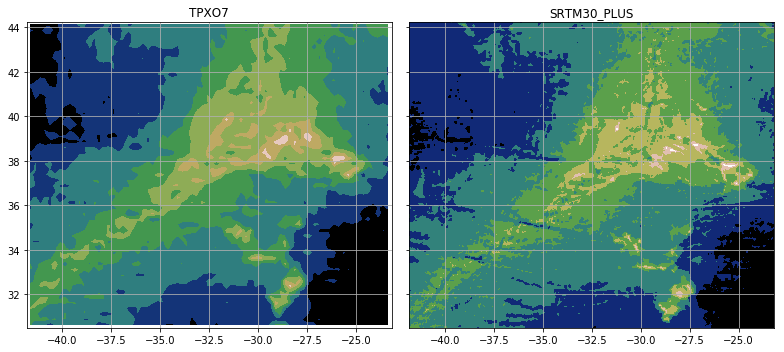

In [83]:
### compare topography
mini = 0
maxi = 5000
cmap = 'gist_earth_r'

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(11,5))
ax1.contourf(lon_r-360,lat_r,h_t,vmin=mini,vmax=maxi,cmap=cmap)
#ax2.contourf(lon_h,lat_h,h,vmin=mini,vmax=maxi,cmap=cmap)
ax2.contourf(lon_s,lat_s,h_s,vmin=mini,vmax=maxi,cmap=cmap)
ax1.grid(True)
ax2.grid(True)
#ax3.grid(True)
ax1.set_title('TPXO7')
ax2.set_title('SRTM30_PLUS')
#ax3.set_title('SRTM30_PLUS')

#ax1.set_aspect((lon_h.max()-lon_h.min())/(lat_h.max()-lat_h.min()))
#ax1.axis('square')

fig.set_tight_layout(True)
#plt.savefig('pictures/compar_topo_TPXO7_SRTM30.png',dpi=200,magnification='auto',bbox_inches='tight')